In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('../style/elegant.mplstyle')

In [21]:
def fraction_higher(degree, alpha, gamma):
    return alpha * degree ** (-gamma)

In [22]:
import pandas as pd
import numpy as np
connectome_url = 'http://www.wormatlas.org/images/NeuronConnect.xls'
conn = pd.read_excel(connectome_url)

In [23]:
conn_edges = [(n1, n2, {'weight': s})
              for n1, n2, t, s in conn.itertuples(index=False, name=None)
              if t.startswith('S')]

In [24]:
import networkx as nx
wormbrain = nx.DiGraph()
wormbrain.add_edges_from(conn_edges)

In [25]:
centrality = nx.betweenness_centrality(wormbrain)

In [26]:
central = sorted(centrality, key=centrality.get, reverse=True)
print(central[:5])

['AVAR', 'AVAL', 'PVCR', 'PVT', 'PVCL']


In [27]:
sccs = (wormbrain.subgraph(c) for c in nx.strongly_connected_components(wormbrain))
giantscc = max(sccs, key=len)
print(f'The largest strongly connected component has '
      f'{giantscc.number_of_nodes()} nodes, out of '
      f'{wormbrain.number_of_nodes()} total.')

The largest strongly connected component has 237 nodes, out of 279 total.


In [28]:
in_degrees = list(dict(wormbrain.in_degree()).values())
in_deg_distrib = np.bincount(in_degrees)
avg_in_degree = np.mean(in_degrees)
cumfreq = np.cumsum(in_deg_distrib) / np.sum(in_deg_distrib)
survival = 1 - cumfreq

In [29]:
x = 1 + np.arange(len(survival))
valid = x > 10
x = x[valid]
y = survival[valid]

In [30]:
from scipy.optimize import curve_fit

alpha_fit, gamma_fit = curve_fit(fraction_higher, x, y)[0]

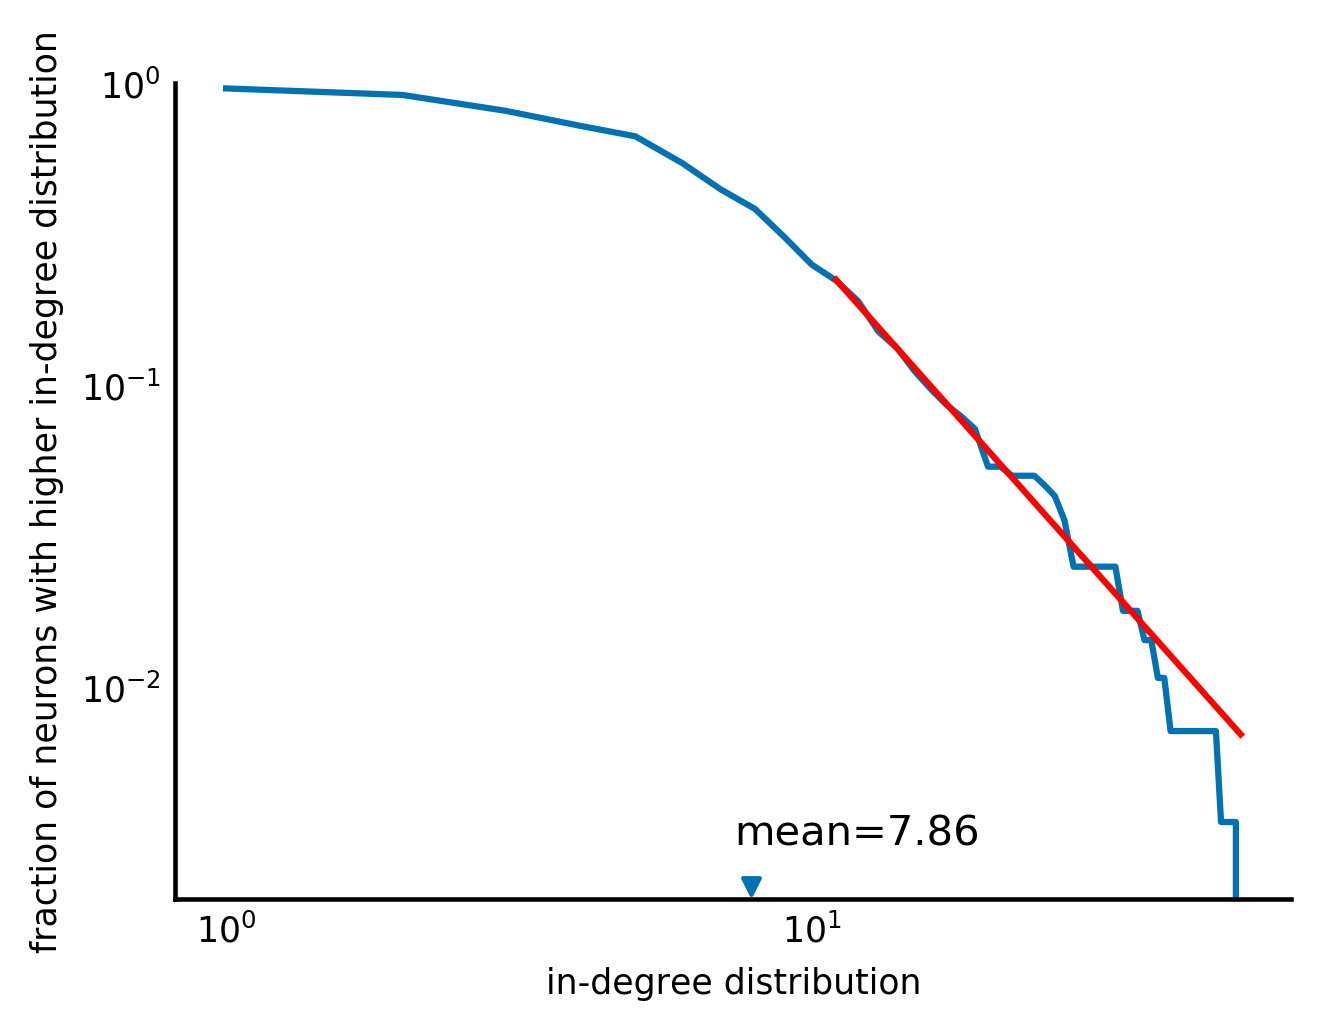

In [31]:
y_fit = fraction_higher(x, alpha_fit, gamma_fit)

fig, ax = plt.subplots()
ax.loglog(np.arange(1, len(survival) + 1), survival)
ax.set_xlabel('in-degree distribution')
ax.set_ylabel('fraction of neurons with higher in-degree distribution')
ax.scatter(avg_in_degree, 0.0022, marker='v')
ax.text(avg_in_degree - 0.5, 0.003, 'mean=%.2f' % avg_in_degree)
ax.set_ylim(0.002, 1.0)
ax.loglog(x, y_fit, c='red');